#  Importing Libs

In [227]:
from os import walk
from os.path import join
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import nltk     ### NLP 
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import collections

from wordcloud import WordCloud    ## CREATE WORDCLOUD


from bs4 import BeautifulSoup

from PIL import Image    ## PILLOW - Image manipulation

%matplotlib inline

# CONSTANTS

In [297]:
SPAM_1_PATH = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'


SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

JSON_PATH = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/json_text.json'
WORD_ID_FILE = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/word-by-id.csv'

TEST_DATA_FILE = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/02_Training/word-test-data.txt'
TRAINING_DATA_FILE = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/02_Training/word-data.txt'

T_UP = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/wordcloud_resources/thumbs-up.png'
T_DOWN = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/wordcloud_resources/thumbs-down.png'
SKUN_FILE = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/wordcloud_resources/skull-icon.png'
WHALE_FILE = '/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/wordcloud_resources/whale-icon.png'

In [3]:
stream = open('/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/practice_email.txt')
message = stream.read()
stream.close()

print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [4]:
sys.getfilesystemencoding()

'utf-8'

## Extract the body from the message

In [5]:
## EXTRATCING THE BODY FROM THE MESSAGE ( body messages starts after blank ('\n') line)

stream = open('/Users/netof/Desktop/DATA SCIENCE/[FreeCourseSite.com] Udemy - Complete 2020 Data Science & Machine Learning Bootcamp/6. Pre-Process Text Data for a Naive Bayes Classifier to Filter Spam Emails Part 1/SpamData/01_Processing/practice_email.txt')
## CHECK FOR BLANK LINE , IF THERE IS A BLANK LINE, IS_BODY = TRUE!
is_body = False
lines = [] 

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True


stream.close()


email_body = "\n".join(lines)
print(email_body)





Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

## GENERATING FUNCTIONS


In [6]:
## USED FOR GIGANTIC DATA BASE

def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [7]:
for i in generate_squares(5):
    print(i, end = ' ->')

0 ->1 ->4 ->9 ->16 ->

### Email body extraction

In [8]:
def email_body_generator(path):    
    
    ## get the body and file names from directory
    for root, dirnames , filenames in walk(path):  
        
        for file_name in filenames:
            
            ## join root/file_name to create path for extraction
            filepath = join(root,file_name)        
            
            ## creates stream and especify encoding 
            stream = open(filepath,encoding ='latin-1')
            
            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True


            stream.close()


            email_body = "\n".join(lines)
            
            yield file_name , email_body
        

In [9]:
def df_from_directory(path,classification):
    
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
    
    return pd.DataFrame(rows,index= row_names)

In [10]:
spam_emails_1 = df_from_directory(SPAM_1_PATH,1)
spam_emails_2 = df_from_directory(SPAM_2_PATH,1)
non_spam_emails_1 = df_from_directory(EASY_NONSPAM_1_PATH,0)
non_spam_emails_2 = df_from_directory(EASY_NONSPAM_2_PATH,0)

In [11]:
spam_list = [spam_emails_1,spam_emails_2,non_spam_emails_1,non_spam_emails_2]

In [12]:
data= pd.concat(spam_list)

## DATA CLEANING

CHECK FOR MISSING VALUES

In [13]:
## CHECK IF MESSAGE BODIES ARE NULL

In [14]:
data[data.MESSAGE.isnull()] ## method 1

,MESSAGE,CATEGORY


In [15]:
data['MESSAGE'].isnull().values.any() ## method 2

False

In [16]:
data.MESSAGE.isnull().sum() ## count number of null values

0

In [17]:
## CHECK AND LOCATE IF THERE IS MESSAGES WITH EMPTY BODIES.
print((data.MESSAGE.str.len() == 0).sum())
data[data['MESSAGE'] == '']

3


,MESSAGE,CATEGORY
cmds,,1
cmds,,1
cmds,,0


In [18]:
#DEL ROWS
data.drop(['cmds'] , inplace = True)

In [19]:
data

,MESSAGE,CATEGORY
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",1
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,1
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,1
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,1
...,...,...
00609.dd49926ce94a1ea328cce9b62825bc97,"I'm one of the 30,000 but it's not working ver...",0
00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,0
01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",0
01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",0


### ADD DOCUMENTS ID TO TRACK EMAILS

In [20]:
document_ids = range(0,len(data))
data['DOC_ID'] = document_ids

In [21]:
data['FILE NAME'] = data.index
## data.set_index = ('DOC_ID')

In [22]:
data

,MESSAGE,CATEGORY,DOC_ID,FILE NAME
00249.5f45607c1bffe89f60ba1ec9f878039a,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",1,0,00249.5f45607c1bffe89f60ba1ec9f878039a
00373.ebe8670ac56b04125c25100a36ab0510,ATTENTION: This is a MUST for ALL Computer Use...,1,1,00373.ebe8670ac56b04125c25100a36ab0510
00214.1367039e50dc6b7adb0f2aa8aba83216,This is a multi-part message in MIME format.\n...,1,2,00214.1367039e50dc6b7adb0f2aa8aba83216
00210.050ffd105bd4e006771ee63cabc59978,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1,3,00210.050ffd105bd4e006771ee63cabc59978
00033.9babb58d9298daa2963d4f514193d7d6,This is the bottom line. If you can GIVE AWAY...,1,4,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...,...
00609.dd49926ce94a1ea328cce9b62825bc97,"I'm one of the 30,000 but it's not working ver...",0,5791,00609.dd49926ce94a1ea328cce9b62825bc97
00957.e0b56b117f3ec5f85e432a9d2a47801f,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,0,5792,00957.e0b56b117f3ec5f85e432a9d2a47801f
01127.841233b48eceb74a825417d8d918abf8,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",0,5793,01127.841233b48eceb74a825417d8d918abf8
01178.5c977dff972cd6eef64d4173b90307f0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",0,5794,01178.5c977dff972cd6eef64d4173b90307f0


In [23]:
data.set_index('DOC_ID', inplace = True)

### Export as json_file

In [24]:
data.to_json(JSON_PATH)

### PIE CHARTS

In [25]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [26]:
ham = data.CATEGORY.value_counts()[1]
spam = data.CATEGORY.value_counts()[0]

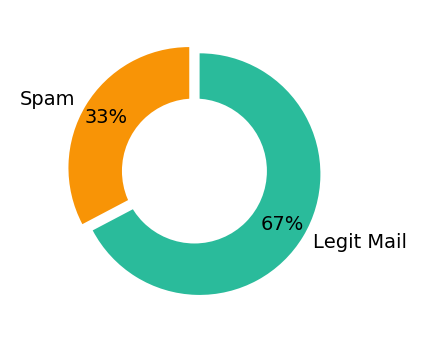

In [27]:
category_names = ['Spam', 'Legit Mail']
sizes = [ham,spam]
custom_colours = ['#f89406', '#2abb9b']
off_set = [0.05, 0.05]

plt.figure(figsize= (2,2), dpi =200)
plt.pie(sizes,labels =category_names, textprops={'fontsize' : 7} ,
        startangle=90, autopct='%1.0f%%', colors= custom_colours ,
        pctdistance= 0.8 , explode= off_set)


## DONUT CHARTS!
## DRAW A CIRCLE
centre_circle = plt.Circle((0,0) , radius = 0.6, fc='white')
plt.gca().add_artist(centre_circle)   ## GCA = GET CURRENT AXIS


## NATURAL LANGUAGE PROCESSING

### Text pre-processing

In [28]:
## USE STR.LOWER()

In [29]:
msg ='All work and no play makes Jake Idiot. \
    Nobody expects the Spanish Inquisition !'.lower()

In [30]:
## read books

nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package gutenberg to /Users/netof/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     /Users/netof/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

### Tokenising


In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/netof/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
word_tokenize(msg.lower()) ## same as spliting the string


['all',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'jake',
 'idiot',
 '.',
 'nobody',
 'expects',
 'the',
 'spanish',
 'inquisition',
 '!']

### Remove Stop Words

In [33]:
# stopwords.words('english') ## chose whatever language

stop_words = set(stopwords.words('english')) ## CREATE A SET OF STOPWORDS

In [34]:
print(type(stop_words))

<class 'set'>


In [35]:
if 'this' in stop_words:
    print('Founded!')

Founded!


In [36]:
words = word_tokenize(msg.lower()) ## CREATE A FILTER FOR WORDS IN THE MSG

filtered_words = []

for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['work', 'play', 'makes', 'jake', 'idiot', '.', 'nobody', 'expects', 'spanish', 'inquisition', '!']


### Word Stems and Stemming

In [37]:
## CREATE A FILTER FOR WORDS IN THE MSG
words = word_tokenize(msg.lower())

#stemmer = PorterStemmer()
stemmer = SnowballStemmer('english') ### CHOSE BETWEEN SNOWBALL AND PORTER
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():   ## remove stop words 
                                                    ## and punctuation
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)

['work', 'play', 'make', 'jake', 'idiot', 'nobodi', 'expect', 'spanish', 'inquisit']


### Removing HTML tagas from the Emails

In [38]:
data.at[2, 'MESSAGE'] ## index name , column name

soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser') ## CREATE SOUP
 
soup.get_text()    ## REMOVE ALL HTML TAGS! GET ONLY TEXT .


'This is a multi-part message in MIME format.\n\n\n\n------=_NextPart_000_1CDC19_01C25366.4B57F3A0\n\nContent-Type: text/plain;\n\n\tcharset="Windows-1252"\n\nContent-Transfer-Encoding: quoted-printable\n\n\n\n We dare you...\n\n Try to find a better annuity!\n\n=20\n\n  - 5.40% Guaranteed for 6 Years=0A=\n\n- 6 Year Surrender Charge=0A=\n\n- 5% Agent\n\nCommission up to age 80=09\n\nCall today for more information!\n\n 800-888-7641 ext. 103\n\n- or -\n\n\n\nPlease fill out the form below for more information\t=20\n\nName:\t \t  =09\n\nE-mail:\t \t=20\n\nPhone:\t \t=20\n\nCity:\t \t State:\t \t=20\n\n \t    =09\n\n=20\n\n PMG Financial Services\n\n*5.40% for deposits of $100,000 and up, 5.25% interest for deposits\n\ntotalling $25,000-$99,999.\t=20\n\nWe don\'t want anyone to receive our mailings who does not wish to\n\nreceive them. This is a professional communication sent to insurance\n\nprofessionals. To be removed from this mailing list, DO NOT REPLY to\n\nthis message. Instead, g

### Create fucntion for cleaning all the emails!

In [39]:
def clean_msg_no_html(message,stemmer = PorterStemmer(),
               stop_words = set(stopwords.words('english'))):
    
    #REMOVE HTML TAGS WITH BEAUFIFULL SOUP
    soup = BeautifulSoup(message,'html.parser').get_text()
    
    #TOKENIZE WORDS
    words = word_tokenize(soup.lower())
    
    #CREATE LIST TO APPEND CLEAN EMAIL
    filtered_words = []
    
    #LOOP THROUGH THE WORDS
    for word in words:
        
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
            
    return filtered_words
            

In [40]:
clean_msg_no_html(email_body) ## sample testing

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [41]:
clean_msg_no_html(data.at[2,'MESSAGE'])

['messag',
 'mime',
 'format',
 'dare',
 'tri',
 'find',
 'better',
 'annuiti',
 'guarante',
 'year',
 'surrend',
 'agent',
 'commiss',
 'age',
 'call',
 'today',
 'inform',
 'ext',
 'pleas',
 'fill',
 'form',
 'inform',
 'name',
 'phone',
 'citi',
 'state',
 'pmg',
 'financi',
 'servic',
 'deposit',
 'interest',
 'deposit',
 'total',
 'want',
 'anyon',
 'receiv',
 'mail',
 'wish',
 'receiv',
 'profession',
 'commun',
 'sent',
 'insur',
 'profession',
 'remov',
 'mail',
 'list',
 'repli',
 'messag',
 'instead',
 'go',
 'http',
 'legal',
 'notic',
 'dare',
 'find',
 'better',
 'annuiti',
 'call',
 'today',
 'inform',
 'pleas',
 'fill',
 'form',
 'inform',
 'name',
 'phone',
 'citi',
 'state',
 'deposit',
 'interest',
 'deposit',
 'total',
 'want',
 'anyon',
 'receiv',
 'mail',
 'wish',
 'receiv',
 'profession',
 'sent',
 'insur',
 'profession',
 'remov',
 'list',
 'repli',
 'messag',
 'instead',
 'go',
 'http',
 'legal',
 'notic']

## Aply Cleaning and tokenization to all messages

### Slicing DF and Series and creating SUBSETS

In [42]:
data.iat[2,2] ## SELECT SINGLE PARTS OF DF

'00214.1367039e50dc6b7adb0f2aa8aba83216'

In [43]:
data.iloc[5:11] ## WORKS IN DF AND SERIES

,MESSAGE,CATEGORY,FILE NAME
DOC_ID,,,
5,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...,1,00187.efd97ab2034b3384606e21db00014ecb
6,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon...",1,00500.85b72f09f6778a085dc8b6821965a76f
7,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...,1,00493.1c5f59825f7a246187c137614fb1ea82
8,"<table width=""600"" border=""20"" align=""center"" ...",1,00012.381e4f512915109ba1e0853a7a8407b2
9,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",1,00487.139a2f4e8edbbdd64441536308169d74
10,"Dear Consumers, Increase your Business Sales! ...",1,00159.b16f070a576c2eb1533aa9e2cf8e6b77


In [44]:
first_emails = data.MESSAGE.iloc[0:3] ## SELECT PARTS OF SPECIFIC COLUMN

nested_list = first_emails.apply(clean_msg_no_html) ## USE Pandas APPLY function (still a series object)

In [45]:
# flat_list = []

# for sublist in nested_list:
#     for item in sublist:
#         flat_list.append(item)
        
# len(flat_list)

flat_list = [item for sublist in nested_list for item in sublist]

len(flat_list)

222

In [46]:
%%time 

nested_list = data.MESSAGE.apply(clean_msg_no_html)

/Users/netof/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:357: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


CPU times: user 35.9 s, sys: 64.6 ms, total: 36 s
Wall time: 36 s


In [47]:
nested_list.tail() ## looks good

DOC_ID
5791    [one, work, well, week, te, updat, server, syn...
5792    [damien, morton, quot, approv, html, abl, say,...
5793    [mon, che, wrote, that, correct, line, ad, rep...
5794    [upon, time, manfr, wrote, would, like, instal...
5795    [run, pick, use, new, ftoc, button, show, mess...
Name: MESSAGE, dtype: object

### Using Logic to Slice the DF

In [48]:
data[data.CATEGORY ==1].head()

,MESSAGE,CATEGORY,FILE NAME
DOC_ID,,,
0,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",1,00249.5f45607c1bffe89f60ba1ec9f878039a
1,ATTENTION: This is a MUST for ALL Computer Use...,1,00373.ebe8670ac56b04125c25100a36ab0510
2,This is a multi-part message in MIME format.\n...,1,00214.1367039e50dc6b7adb0f2aa8aba83216
3,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1,00210.050ffd105bd4e006771ee63cabc59978
4,This is the bottom line. If you can GIVE AWAY...,1,00033.9babb58d9298daa2963d4f514193d7d6


In [49]:
docs_ids_spam = data[data.CATEGORY == 1].index
docs_ids_ham = data[data.CATEGORY == 0].index

### Subsesting a Sereis with an Indx

In [50]:
type(docs_ids_ham)

pandas.core.indexes.numeric.Int64Index

In [51]:
type(nested_list)

pandas.core.series.Series

In [52]:
nested_list_ham = nested_list.iloc[docs_ids_ham]
nested_list_spam = nested_list.iloc[docs_ids_spam]

### List the common words in spam and ham emails

In [86]:
spam_words = [word for message in nested_list_spam for word in message]

spam_words = pd.Series(spam_words).value_counts()
spam_words[0:11]

http      3101
email     3094
free      2555
click     2058
receiv    1987
list      1974
get       1903
pleas     1842
busi      1792
order     1743
mail      1730
dtype: int64

In [87]:
ham_words = [word for message in nested_list_ham for word in message]
ham_words = pd.Series(ham_words).value_counts()
ham_words[0:11]

http      7561
use       3630
list      2878
one       2371
get       2284
mail      2255
would     2003
like      1928
messag    1847
work      1798
time      1740
dtype: int64

## Creating a Word Cloud

(-0.5, 399.5, 199.5, -0.5)

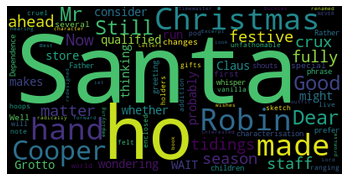

In [55]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation='spline36')
plt.axis('off')

### example from mobdick !

In [56]:
## nltk.download('shakespeare')
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [57]:
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [58]:
## ITS NECESSARY TO CREATE A STRING TO SUPPLY THE GENERATE METHOD

word_list = [''.join(word) for word in example_corpus]
novel_string = ' '.join(word_list)

(-0.5, 2047.5, 1023.5, -0.5)

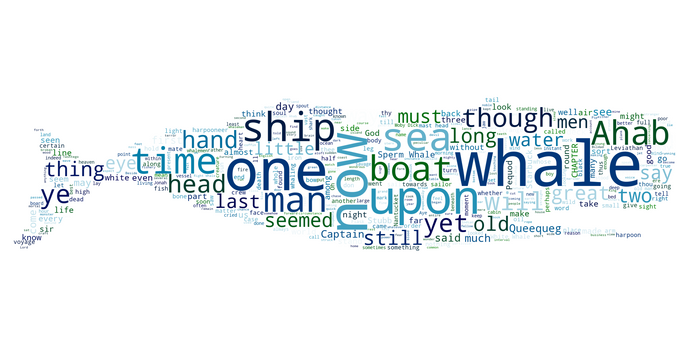

In [59]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode ='RGB',size= icon.size, color = (255,255,255))
image_mask.paste(icon,box = icon)
rgb_array = np.array(image_mask)   # converts image to array

word_cloud = WordCloud(mask = rgb_array ,background_color='white'
                       ,max_words= 400 ,colormap= 'ocean').generate(novel_string)


plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='spline36')
plt.axis('off')

In [65]:
## training with the HAMLET PIECE!
hamlet_corpus = nltk.corpus.shakespeare.words('hamlet.xml')
word_list = [word for word in hamlet_corpus]
word_string = ' '.join(word_list)

(-0.5, 1999.5, 2298.5, -0.5)

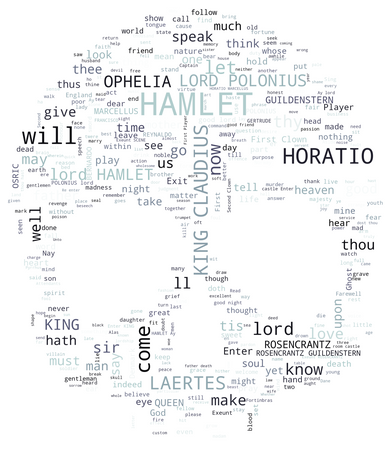

In [69]:
icon = Image.open(SKUN_FILE)
image_mask = Image.new(mode = 'RGB', size = icon.size, color= (255,255,255))
image_mask.paste(icon, box = icon)
rgb_array = np.array(image_mask)

word_cloud = WordCloud(mask = rgb_array, background_color='white',
                      max_words = 400, colormap = 'bone').generate(word_string)

plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='spline36')
plt.axis('off')

### WordCloud for spam/ham msgs

In [104]:
# SETING STRING FOR WD

spam_words['words'] = spam_words.index
spam_list = [x for x in spam_words['words']]
spam_string = ' '.join(spam_list)

ham_words['words'] = ham_words.index
ham_list = [x for x in ham_words['words']]
ham_string = ' '.join(ham_list)


(-0.5, 1527.5, 1599.5, -0.5)

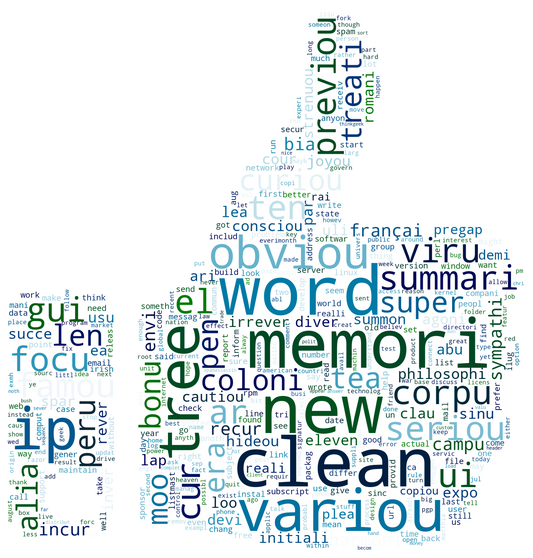

In [109]:
#CREATE IMAGE MASK FOR HAM EMAILS


ham_icon = Image.open(T_UP)
ham_mask = Image.new(mode = 'RGB', size = ham_icon.size, 
                     color = (255,255,255))
ham_mask.paste(ham_icon, box = ham_icon)

ham_mask_array = np.array(ham_mask)
ham_word_cloud = WordCloud(mask = ham_mask_array, background_color='white',
                          max_words= 400, colormap='ocean').generate(ham_string)

plt.figure(figsize=(10,10))
plt.imshow(ham_word_cloud,interpolation='spline36')
plt.axis('off')

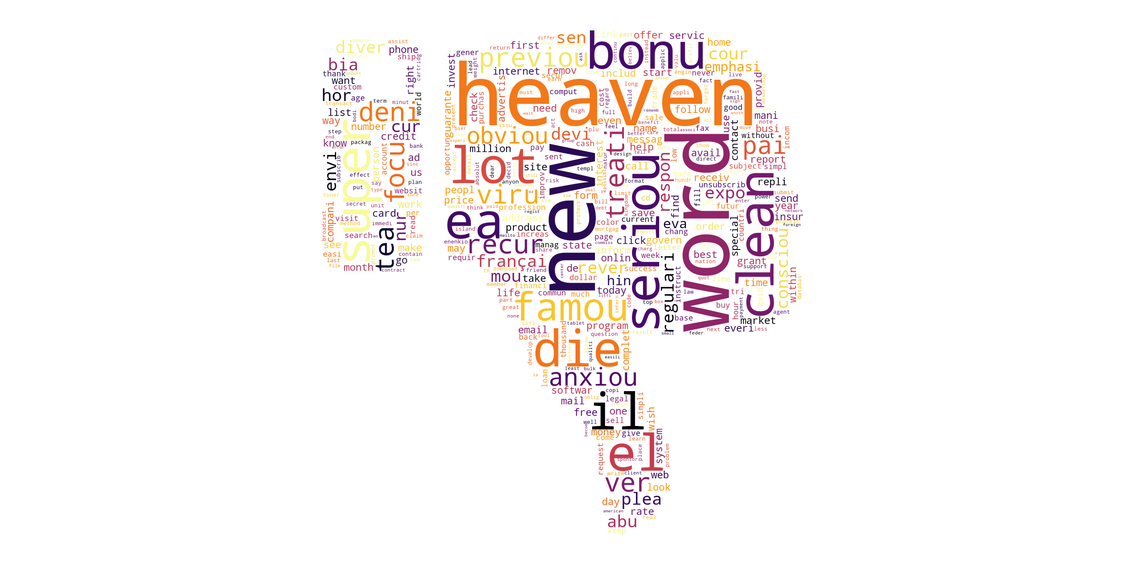

In [112]:
#CREATE WORD CLOUD FOR SPAM MESSAGES

spam_icon = Image.open(T_DOWN)
spam_mask = Image.new(mode = 'RGB', size = spam_icon.size,color = (255,255,255))
spam_mask.paste(spam_icon, box = spam_icon)
spam_array = np.array(spam_mask)

spam_word_cloud = WordCloud(mask = spam_array, background_color='white',
                            max_words=400, colormap='inferno').generate(spam_string)

plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(spam_word_cloud , interpolation='spline36')


## GENERATE VOCABULARY

select the X unique words in the series to start training model

In [114]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]



/Users/netof/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:357: UserWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [115]:
unique_words = pd.Series(flat_stemmed_list).value_counts()

In [117]:
unique_words[0:2500]

http       10662
use         5017
list        4852
email       4370
get         4187
           ...  
bullet        44
leas          44
ratak         44
burner        44
fashion       44
Length: 2500, dtype: int64

In [131]:
frequent_words = unique_words[0:VOCAB_SIZE]

In [134]:
frequent_words[0:10]

http     10662
use       5017
list      4852
email     4370
get       4187
mail      3985
one       3905
free      3171
time      3090
work      2880
dtype: int64

### Create a vocabulary df with IDS

In [238]:
word_ids = list(range(0,VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD' : frequent_words.index.values})
vocab['Word_id'] = word_ids
vocab.set_index('Word_id',inplace = True)
vocab.head(10)

,VOCAB_WORD
Word_id,
0,http
1,use
2,list
3,email
4,get
5,mail
6,one
7,free
8,time


In [146]:
vocab.to_csv(WORD_ID_FILE) ## save csv file

### Check if the word is part of the vocabulary

In [178]:
def check_word(list_of_words):
    for i in list_of_words:
        
        # use set for checking for membership!
        if i in set(vocab.VOCAB_WORD):
            print (f'the word {i} is in the vocabulary')
        else:
            print (f'the word {i} is not in the vocabulary')

In [179]:
words_check = ['machine', 'learning','fun','learn','data', 'science','app','brewery']

In [180]:
check_word(words_check)

the word machine is not in the vocabulary
the word learning is not in the vocabulary
the word fun is in the vocabulary
the word learn is in the vocabulary
the word data is in the vocabulary
the word science is not in the vocabulary
the word app is in the vocabulary
the word brewery is not in the vocabulary


### Finding EMAIL with  most words

In [212]:
clena_email_len = [len(word) for word in nested_list]

In [214]:
## finding len of the biggest email
print(max(clena_email_len))

7671


In [217]:
## finding where it is
np.argmax(clena_email_len)

5401

In [219]:
data.at[np.argmax(clena_email_len), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

## Generating a Sparse Matrix and defining Features

In [224]:
type(stemmed_nested_list.tolist())

list

In [225]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,dear,homeown,interest,rate,lowest,point,year,help,find,best,...,None,None,None,None,None,None,None,None,None,None
1,attent,must,comput,user,packag,deal,norton,systemwork,softwar,suit,...,None,None,None,None,None,None,None,None,None,None
2,messag,mime,format,dare,tri,find,better,annuiti,guarante,year,...,None,None,None,None,None,None,None,None,None,None
3,import,inform,new,domain,name,final,avail,gener,public,discount,...,None,None,None,None,None,None,None,None,None,None
4,bottom,line,give,away,cd,free,peopl,like,one,month,...,None,None,None,None,None,None,None,None,None,None


In [226]:
word_columns_df.shape

(5796, 7671)

### Split the Data into a TRaining and Testig Dataset

In [240]:
X_train ,X_test, y_train, y_test = train_test_split(word_columns_df,data.CATEGORY,test_size = 0.3, random_state = 42)

In [241]:
X_train.index.name = X_test.index.name ='DOC_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,thu,jul,rodent,unusu,size,wrote,appli,one,three,order,...,None,None,None,None,None,None,None,None,None,None
4727,well,would,vaniti,list,forward,least,littl,pure,data,week,...,None,None,None,None,None,None,None,None,None,None
5022,world,wide,word,issu,saturday,august,sent,saturday,subscrib,least,...,None,None,None,None,None,None,None,None,None,None
3504,believ,spamassassin,maintain,scheme,wherebi,corpu,distribut,ie,sever,peopl,...,None,None,None,None,None,None,None,None,None,None
3921,sorri,think,send,realiz,list,sender,usual,anyawi,ask,harri,...,None,None,None,None,None,None,None,None,None,None


### Create a Sparse Matrix for the TRaining Data

In [242]:
word_index = pd.Index(vocab.VOCAB_WORD)

In [253]:
# CREATED A INDEX WITH WORDS

word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'flight', 'dedic', 'potent', 'shoot', 'pleasur', 'bullet', 'leas',
       'ratak', 'burner', 'fashion'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [252]:
# FIND WORD INDEX BY WORD NAME
word_index.get_loc('thu')

396

NameError: name 'word_index' is not defined

In [265]:
def make_sparse_matrix(df, indexed_words,labels):
    
    nr_rows = df.shape[0]
    nr_columns = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_columns):
            
            word = df.iat[i,j]
            
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id, 
                        'WORD_ID': word_id, 'OCCURENCE' : 1}
                
                dict_list.append(item)
                
     
    return pd.DataFrame(dict_list)

In [267]:
%%time
sparse_train_df = make_sparse_matrix(X_train,word_index,y_train)

CPU times: user 2min 40s, sys: 153 ms, total: 2min 40s
Wall time: 2min 40s


In [269]:
sparse_train_df.head()

,LABEL,DOC_ID,WORD_ID,OCCURENCE
0,0,4844,396,1
1,0,4844,495,1
2,0,4844,2385,1
3,0,4844,496,1
4,0,4844,37,1


In [270]:
 sparse_train_df.shape

(445913, 4)

### GROUPBY WITH PANDAS

In [274]:
train_grouped = sparse_train_df.groupby(['DOC_ID','WORD_ID','LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      0       1              2
       7       1              1
       15      1              1
       18      1              1
       24      1              1

In [275]:
vocab.at[0,'VOCAB_WORD']

'http'

In [276]:
data.MESSAGE[0]

'Dear Homeowner,\n\n \n\nInterest Rates are at their lowest point in 40 years!\n\n\n\nWe help you find the best rate for your situation by\n\nmatching your needs with hundreds of lenders!\n\n\n\nHome Improvement, Refinance, Second Mortgage,\n\nHome Equity Loans, and More! Even with less than\n\nperfect credit!\n\n\n\nThis service is 100% FREE to home owners and new\n\nhome buyers without any obligation. \n\n\n\nJust fill out a quick, simple form and jump-start\n\nyour future plans today!\n\n\n\n\n\nVisit http://61.145.116.186/user0201/index.asp?Afft=QM10\n\n\n\n\n\n\n\n\n\n\n\n\n\nTo unsubscribe, please visit:\n\n\n\nhttp://61.145.116.186/light/watch.asp\n\n\n\n\n'

In [277]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,0,1,2
1,0,7,1,1
2,0,15,1,1
3,0,18,1,1
4,0,24,1,1


In [278]:
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
265412,5795,1537,0,2
265413,5795,1904,0,1
265414,5795,1908,0,2
265415,5795,2139,0,1
265416,5795,2291,0,1


In [284]:
# reduction from sparse matrix

train_grouped.shape

(265417, 4)

### Save Training Data as .txt File

In [287]:
np.savetxt(TRAINING_DATA_FILE,train_grouped, fmt = '%d')

In [288]:
train_grouped

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,0,1,2
1,0,7,1,1
2,0,15,1,1
3,0,18,1,1
4,0,24,1,1
...,...,...,...,...
265412,5795,1537,0,2
265413,5795,1904,0,1
265414,5795,1908,0,2
265415,5795,2139,0,1


In [291]:
%%time
## CREATE SPARSE MATRIX FOR THE TEST DATA
sparse_test_df = make_sparse_matrix(X_test,word_index,y_test)
            
            

CPU times: user 1min 11s, sys: 270 ms, total: 1min 11s
Wall time: 1min 12s


In [292]:
sparse_test_df.shape

(188220, 4)

In [295]:
### group the params and sum the occorences
test_groupped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID','LABEL']).sum().reset_index()

In [296]:
test_groupped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,7,1,1
1,8,8,1,1
2,8,12,1,1
3,8,19,1,2
4,8,26,1,1


In [298]:
np.savetxt(TEST_DATA_FILE, test_groupped, fmt = '%d')